## Rates Analysis

### Import & Load
***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys

root = os.environ['HOME']+"/private/pca-yield-curve-analytics/"
sys.path.append(root)

from src.utils import rainbow

In [2]:
plt.rcParams.update({'font.size': 8})

In [3]:
df = pd.read_csv("../assets/rates_clean.csv", index_col="DATE", parse_dates=["DATE"])

maturities = ["3M", "1Y", "5Y", "10Y", "20Y"]
maturities_all = df.columns

### Analysis
***

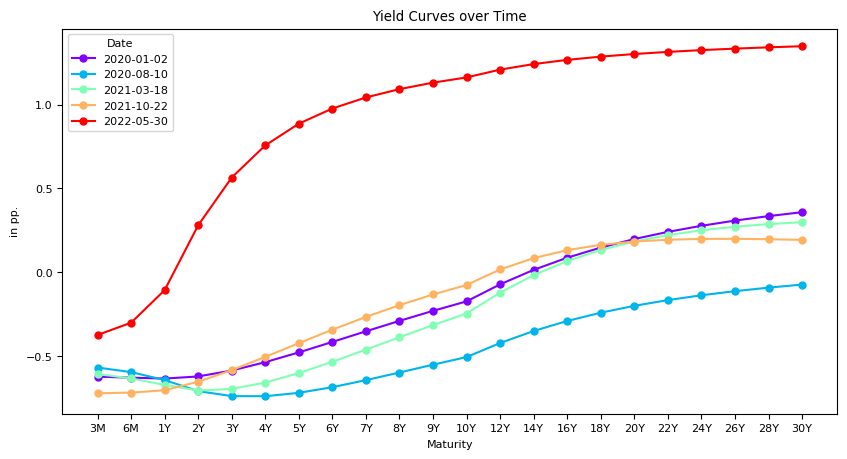

In [4]:
dates = df[::len(df)//5].index

# Depict yield curves per each observed year end
fig, ax = plt.subplots(figsize=(10,5))
color = rainbow(dates)

for i,j in enumerate(dates):
    ax.plot(df.loc[j], marker="o", markersize=5, c=color[j], label=j.date())

ax.set_title ("Yield Curves over Time")
ax.set_xlabel ("Maturity")
ax.set_ylabel ("in pp.")
ax.legend(title="Date", loc="upper left")

plt.show()

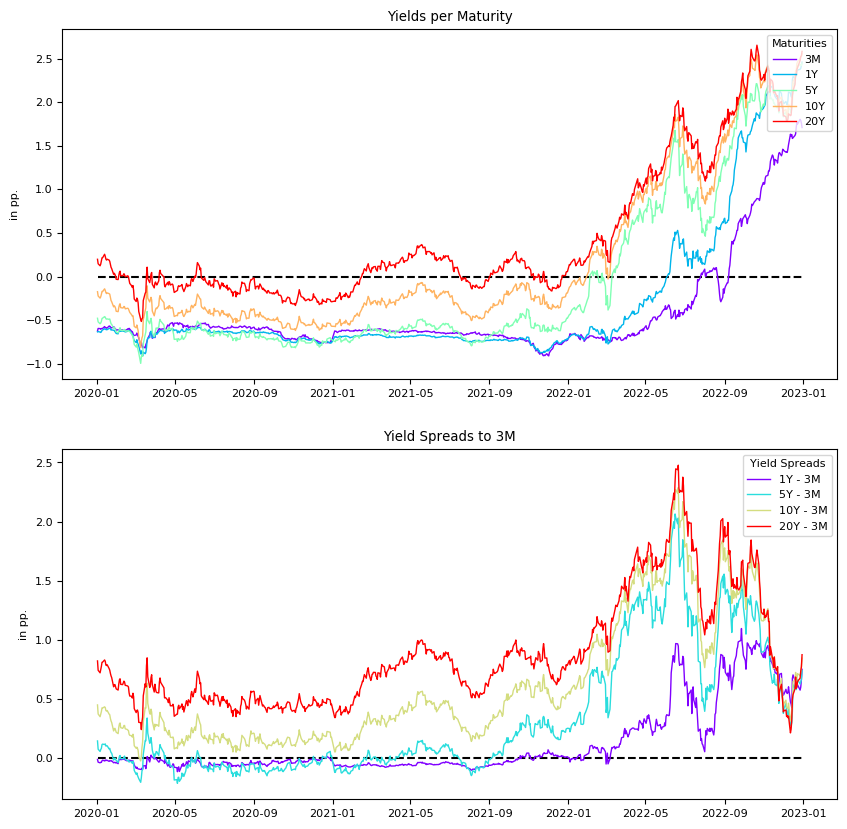

In [5]:
# Depicting yields for various maturities over time
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize = (10,10))

color_1 = rainbow(maturities)
color_2 = rainbow(maturities[1:])

# Subplot #1
for i in maturities: 
    ax1.plot (df[i], c=color_1[i], label=i, linewidth=1)

ax1.hlines(
    y=0, 
    xmin=min(df.index), 
    xmax=max(df.index), 
    colors="black", 
    linestyles="dashed"
)

# Subplot #2
for i in maturities[1:]: 
    plt.plot (df[i]-df.iloc[:,0], c=color_2[i], label= i+" - 3M", linewidth=1)
     
ax2.hlines(
    y=0,
    xmin=min(df.index), 
    xmax=max(df.index), 
    colors="black", 
    linestyles="dashed", 
    label=""
)

ax1.set_title ("Yields per Maturity")
ax2.set_title ("Yield Spreads to 3M")
ax1.set_ylabel ("in pp.")
ax2.set_ylabel ("in pp.")
ax1.legend(title = "Maturities", loc = "upper right")
ax2.legend(title = "Yield Spreads", loc = "upper right")
plt.show()

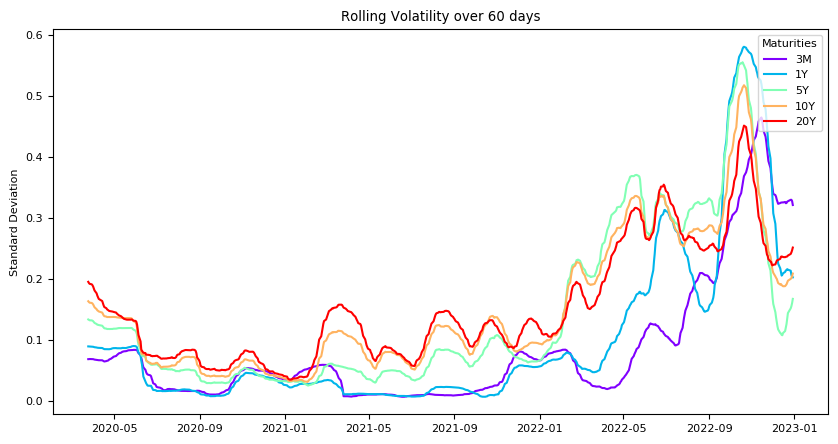

In [6]:
# Insert time window for rolling volatility (in units of previously defined frequency)
roll_window = 60
roll_vola = df.rolling(roll_window).std().iloc[roll_window-1:]

# Depicting rolling volatility for various maturities over time
fig, ax = plt.subplots(figsize=(10,5))

for i in maturities:
    ax.plot(roll_vola[i], c=color_1[i], label=i)

ax.set_title (f'Rolling Volatility over {roll_window} days')
ax.set_ylabel ("Standard Deviation")
ax.legend(title="Maturities", loc="upper right")
plt.show()